In [1]:
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Running Your First Notebook

In [6]:
# CLICK ME
from fastai.vision.all import vision_learner, resnet34, error_rate, untar_data,\
get_image_files, URLs, Resize, ImageDataLoaders, accuracy


# fast.ai 의 데이터 컬렉션에서 데이터셋을 서버에 다운로드하고,
# 압축을 해제한 다음, 추출된 위치를 Path 객체로 반환한다.
path = untar_data(URLs.PETS)/'images'
print(path, type(path))

def is_cat(x): return x[0].isupper() # P,A,E, ... = cat(True), p,a,e, ... = dog(False)

data_loaders = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
# valid_pct: 검증용 데이터셋의 비율

learn = vision_learner(data_loaders, resnet34, metrics=[error_rate, accuracy])
learn.fine_tune(epochs=1) # 우리의 데이터를 사전학습 모델에 fit 시켜준다.

/root/.fastai/data/oxford-iiit-pet/images <class 'pathlib.PosixPath'>


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.177594,0.016767,0.007442,0.992558,00:58


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.047954,0.020611,0.008796,0.991204,00:57


### Sidebar: This Book Was Written in Jupyter Notebooks

In [7]:
1+1

2

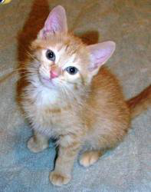

In [8]:
from fastbook import image_cat, PILImage


img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [9]:
from fastbook import widgets


uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [11]:
#hide
# For the book, we can't actually click an upload button, so we fake it
# from fastbook import SimpleNamespace
# uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [10]:
from fastbook import PILImage


img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(img)  # learn: 위에서 학습한 모델
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


### What Is Machine Learning?

In [11]:
from fastbook import gv

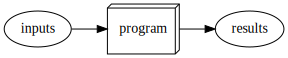

In [12]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

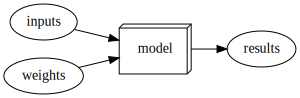

In [13]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

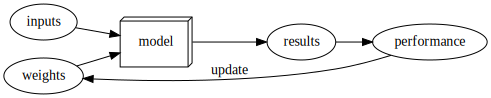

In [14]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

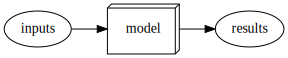

In [15]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

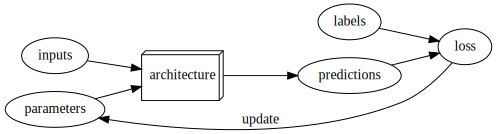

In [16]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

- 딥러닝 용어 사전
    - 레이블: "개"나 "고양이" 처럼 예측하려는 데이터
    - 구조/아키텍쳐: 적합하려는 모델의 템플릿(예: 입력 데이터와 파라미터를 전달받는 실제 수학 함수)
    - 모델: 특정 조합의 파라미터와 결합된 아키텍쳐
    - 파라미터: 모델이 학습되는 동안 갱신되어 모델이 하는 일을 바꾸는 값
    - 적합: 주어진 입력 데이터를 사용하는 모델의 예측이 타깃 레이블과 일치되게끔 모델의 파라미터를 갱신하는 과정
    - 학습: 적합의 동의어
    - 사전 학습된 모델: 일반적으로 대규모 데이터셋에서 이미 학습되었으며, 미세 조정해야 하는 모델
    - 미세 조정: 다른 작업을 위해 사전 학습된 모델을 갱신하는 과정
    - 에포크: 모든 입력 데이터가 모델에 한 번씩 통과된 상황
    - 손실: SGD가 학습을 이끄는 기준으로, 선택된 모델이 얼마나 좋은지를 측정
    - 평가지표: 사람이 직접 사용할 용도로, 선택된 모델이 검증용 데이터셋에서 얼마나 좋은지를 측정
        - `손실과 평가지표의 차이점`: 손실의 목적은 학습 시스템이 가중치를 자동으로 갱신하는 데 사용할 수 있는 '성능 측정'을 정의하는 것이다. 즉 좋은 손실을 선택하면 확률적 경사 하강법이 쉽게 길을 찾아갈 수 있다. 반면 평가지표는 사람이 활용할 수 있는 형태로 정의되었다. 즉 좋은 평가지표란 사람이 이해하기 쉽고, 모델이 수행할 작업에 최대한 들어맞는 지표이다. 때로는 손실 함수가 적절한 평가지표가 되지만, 반드시 그렇지는 않다. `정리하자면 평가지표는 사람의 이해를 돕고, 손실은 자동화된 학습을 이끌어간다는 점이 주된 차이점이다.`
    - 검증용 데이터셋: 모델이 얼마나 좋은지를 측정하는 데만 사용하려고 학습용 데이터셋에서 떼어낸 데이터 집합
    - 학습용 데이터셋: 모델을 적합시키는 데 사용하는 데이터로, 검증용 데이터셋과 겹치지 않음(주의)
    - 과적합: 입력 데이터의 특정한 특징을 기억하도록 모델을 학습시킨 상태, 학습 시 보지 못한 데이터에서 일반화가 잘 되지 않음
    - CNN: 영상 처리 작업에서 특히 잘 작동하는 신경망인 합성곱 신경망

- Abstract for Machine Learning & Deep Learning
    - 머신러닝(Machine Learning): 머신러닝은 프로그램을 직접 작성하지 않고 데이터에서 학습하여 프로그램을 만드는 학문이다.
    - 딥러닝(Deep Learning): 딥러닝은 머신러닝의 한 분야로 여러 `계층`으로 구성된 `신경망(Neural Network)`을 사용한다. `이미지 분류(Image Calssification) 혹은 이미지 인식(Image Recognition)`이라고도 하는 것이 대표적인 예시이다.
        - 이미지를 분류하려면 `레이블된 데이터(Labeled Data)`가 필요하다. 레이블된 데이터란, 각 이미지에 이미지가 나타내는 내용을 표시하는 레이블을 할당한 데이터를 말한다.
        - 이미지 분류 모델의 목표는 새로운 이미지가 무엇을 나타내는지를 정확히 `예측(추론)`하는 `모델`이라는 프로그램을 만드는 것이다.
        - 모델을 얻는 과정은 `구조/아키텍쳐`를 고르는 일로 시작된다. 구조(Structure)란, 특정 유형의 모델이 내부적으로 작동하는 방식에 관한 일반적인 템플릿이다.
        - 모델을 `학습(적합)`시키는 과정은 해당 템플릿(구조/아키텍쳐)을 우리의 데이터에서 잘 작동하게끔 만드는 특정 `파라미터의 값(가중치)`을 찾는 과정이라고 할 수 있다.
        - 모델이 단일 예측을 얼마나 잘 수행했는지를 측정하려면, 예측의 좋고 나쁜 정도를 측정하는 `손실 함수(비용함수)`를 정의해야 한다.
        - 모델의 학습 과정을 빠르게 하려면 다른 누군가의 데이터를 사용해 이미 학습된 적이 있는 `사전 학습 모델(pre-trained model)`을 사용해서 시작하면 된다. 그다음 해당 모델을 우리의 데이터에서 약간 더 학습시키는 `미세 조정(fine tuning)`의 과정을 거쳐 새로운 데이터에 적응된 모델을 만들어낼 수 있다.
        - 모델을 학습시킬 때는 모델이 `일반화`되도록 해야 한다. 즉 데이터에서 일반적인 내용을 학습하면 새로운 데이터에 적용하여 좋은 예측을 만들어낼 수 있다. 만약 학습이 나쁜 방향으로 이루어져서 모델이 학습 시 본 내용을 통쩨로 암기해버린다면, 새로운 이미지에 대한 예측을 잘못 수행할 수 있다. 이런 실패 상황을 `과적합(over fitting)`이라고 한다.
        - 모델의 과적합을 피하려면 데이터를 항상 `학습용`과 `검증용 데이터셋`으로 나눠야 한다. 학습용 데이터셋은 모델 학습 시에만 사용하고, 검증용 데이터셋은 모델이 얼마나 예측을 잘 수행해내는지 평가하는 용도로만 써야 한다. `이 방식은 모델이 학습용 데이터셋에서 배운 내용을 검증용 데이터셋에서도 일반화할 수 있는지를 학인하게 해준다.`
        - `평가지표`는 모델이 검증용 데이터셋에 대해 얼마나 (일반화를)잘 해내는지 사람이 이해하도록 표현하는 수단이다.  
        - 학습 과정에서 학습용 데이터셋의 모든 데이터가 한 번씩 모델에 입력된 시점을 하나의 `에포크`라고 표현한다.
  - 위 모든 개념들은 데이터를 학습해 모델을 정의하는 일반적인 머신러닝에도 적용된다. 딥러닝을 특별하게 만드는 것은 `신경망`을 기반으로 하는 특수한 구조이다. 특히 이미지 분류와 같은 작업은 `CNN(Convolutional Neural Network)`에 크게 의존한다.

## Deep Learning Is Not Just for Image Classification

In [5]:
from fastbook import untar_data, URLs, SegmentationDataLoaders, get_image_files,\
unet_learner, error_rate, accuracy, resnet34
import numpy as np


path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.778429,2.251733,00:02


epoch,train_loss,valid_loss,time
0,1.859015,1.644706,00:02
1,1.583930,1.290884,00:02
2,1.390496,1.325207,00:02
3,1.303489,1.168689,00:02
4,1.190537,0.990549,00:02
5,1.088158,0.926490,00:02
6,0.997324,0.884826,00:02
7,0.923720,0.876463,00:02


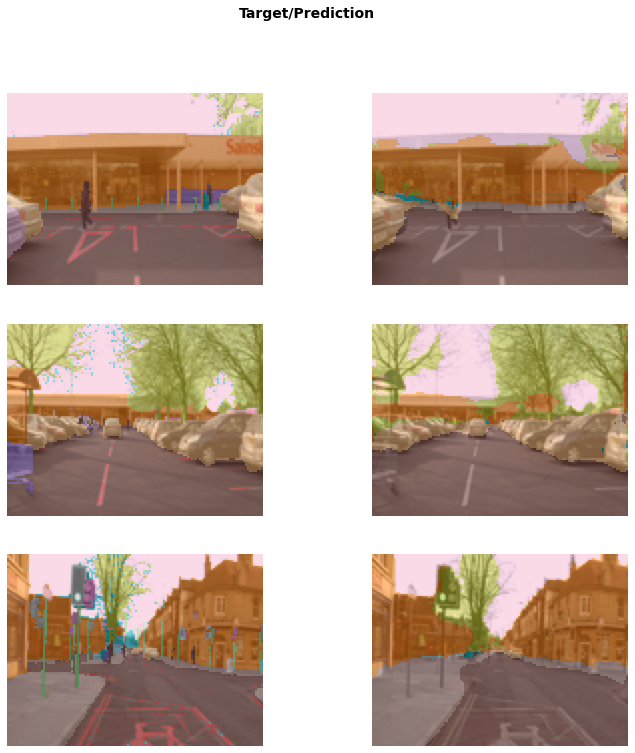

In [10]:
learn.show_results(max_n=3, figsize=(12,12))

In [11]:
from fastai.text.all import untar_data, URLs, TextDataLoaders, text_classifier_learner, AWD_LSTM,\
accuracy


dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.461778,0.385480,0.827760,03:37


epoch,train_loss,valid_loss,accuracy,time
0,0.302235,0.239840,0.902400,07:25
1,0.251926,0.208657,0.917360,07:23
2,0.189552,0.188395,0.928000,07:23
3,0.152325,0.196029,0.927960,07:24


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [12]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([3.7174e-04, 9.9963e-01]))

In [13]:
learn.predict("This movie deverves 5 out of 5 stars.")

('pos', tensor(1), tensor([0.1059, 0.8941]))

In [15]:
learn.predict("It was not bad except for the ending.")

('neg', tensor(0), tensor([0.5206, 0.4794]))

In [16]:
learn.predict("The plot was very disappointing.")

('neg', tensor(0), tensor([0.8885, 0.1115]))

In [ ]:
from fastbook import docs
docs(learn.predict)

### Sidebar: The Order Matters

### End sidebar

In [17]:
from fastai.tabular.all import untar_data, URLs, TabularDataLoaders, Categorify,\
FillMissing, Normalize, tabular_learner


path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [18]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.382079,0.373137,0.830774,00:04
1,0.362293,0.355178,0.835688,00:04
2,0.354138,0.350318,0.841370,00:04


In [19]:
from fastai.collab import untar_data, URLs, CollabDataLoaders, collab_learner


path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.504872,1.427896,00:00


epoch,train_loss,valid_loss,time
0,1.379271,1.366102,00:00
1,1.280588,1.176452,00:00
2,1.031911,0.859585,00:00
3,0.808693,0.715892,00:00
4,0.702465,0.680485,00:00
5,0.653413,0.668865,00:00
6,0.635912,0.663412,00:00
7,0.623893,0.660965,00:00
8,0.613648,0.660215,00:00
9,0.616769,0.660076,00:00


In [21]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,100.0,93.0,5.0,4.092637
1,27.0,75.0,4.0,3.771265
2,94.0,14.0,3.5,4.298845
3,6.0,72.0,4.0,3.346062
4,5.0,19.0,2.0,2.692387
5,25.0,9.0,3.0,3.386370
6,27.0,10.0,2.5,2.426747
7,44.0,86.0,4.5,4.165524
8,31.0,76.0,4.0,3.935578


## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. Do you need these for deep learning?(딥러닝에 다음과 같은 사항이 필요한가요?)

   - Lots of math(뛰어난 수학 지식) T / F
   - Lots of data(많은 양의 데이터) T / F
   - Lots of expensive computers(고가의 컴퓨터) T / F
   - A PhD(박사 학위) T / F
   
1. Name five areas where deep learning is now the best in the world.(현재 딥러닝이 세계 최고인 다섯 가지 분야를 말해보세요.)
1. What was the name of the first device that was based on the principle of the artificial neuron?(인공 뉴런의 원리에 기반한 첫 번째 장치의 이름은 무엇인가요?)
1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?(병렬 분산 처리(PDP)에 대한 요구 사항은 무엇인가요?)
1. What were the two theoretical misunderstandings that held back the field of neural networks?
1. What is a GPU?
1. Open a notebook and execute a cell containing: `1+1`. What happens?
1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
1. Complete the Jupyter Notebook online appendix.
1. Why is it hard to use a traditional computer program to recognize images in a photo?
1. What did Samuel mean by "weight assignment"?
1. What term do we normally use in deep learning for what Samuel called "weights"?
1. Draw a picture that summarizes Samuel's view of a machine learning model.
1. Why is it hard to understand why a deep learning model makes a particular prediction?
1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
1. What do you need in order to train a model?
1. How could a feedback loop impact the rollout of a predictive policing model?
1. Do we always have to use 224×224-pixel images with the cat recognition model?
1. What is the difference between classification and regression?
1. What is a validation set? What is a test set? Why do we need them?
1. What will fastai do if you don't provide a validation set?
1. Can we always use a random sample for a validation set? Why or why not?
1. What is overfitting? Provide an example.
1. What is a metric? How does it differ from "loss"?
1. How can pretrained models help?
1. What is the "head" of a model?
1. What kinds of features do the early layers of a CNN find? How about the later layers?
1. Are image models only useful for photos?
1. What is an "architecture"?
1. What is segmentation?
1. What is `y_range` used for? When do we need it?
1. What are "hyperparameters"?
1. What's the best way to avoid failures when using AI in an organization?

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.